In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

In [2]:
# load data

data = pd.read_excel('weather_data_plot.xlsx', sheet_name='Sheet1')
data['month'] = pd.to_datetime(data['date'], format='%Y%m%d')#.dt.month
data['month'] = data['month'].dt.strftime('%b')
# data['day'] = pd.to_datetime(data['date'], format='%Y%m%d')
# data['day'] = data['day'].dt.strftime('%a')
data['month_day'] = pd.to_datetime(data['date'], format='%Y%m%d')
data['month_day'] = data['month_day'].dt.strftime('%b/%d')
data['avg_temp'] = (data['max_temp'] + data['min_temp'])/2
# data.set_index('month', inplace=True)
# df = pd.DataFrame(data)
# data = data.drop(['date'], axis=1)
data['cum_ppt'] = data['precipitation'].cumsum(axis=0)
# data

In [3]:
# make a copy

df = data.copy()

In [4]:
# get data during cropping season

daily_df = df.iloc[98:205,:]
daily_df.set_index('month_day')

,date,precipitation,max_temp,min_temp,month,avg_temp,cum_ppt
month_day,,,,,,,
Apr/09,2018-04-09,0.00,18.48,6.97,Apr,12.725,103.07
Apr/10,2018-04-10,14.52,18.89,9.63,Apr,14.260,117.59
Apr/11,2018-04-11,10.23,14.42,5.87,Apr,10.145,127.82
Apr/12,2018-04-12,0.00,19.14,4.04,Apr,11.590,127.82
Apr/13,2018-04-13,0.00,15.02,3.41,Apr,9.215,127.82
...,...,...,...,...,...,...,...
Jul/20,2018-07-20,1.76,29.96,11.18,Jul,20.570,266.09
Jul/21,2018-07-21,0.11,27.57,14.00,Jul,20.785,266.20
Jul/22,2018-07-22,0.00,27.69,16.97,Jul,22.330,266.20


In [5]:
# convert to arrays
xx       =  daily_df.month_day.values
temp_max = daily_df['max_temp'].values
temp_min = daily_df['min_temp'].values
temp_avg = daily_df['avg_temp'].values
ppt      = daily_df['precipitation'].values

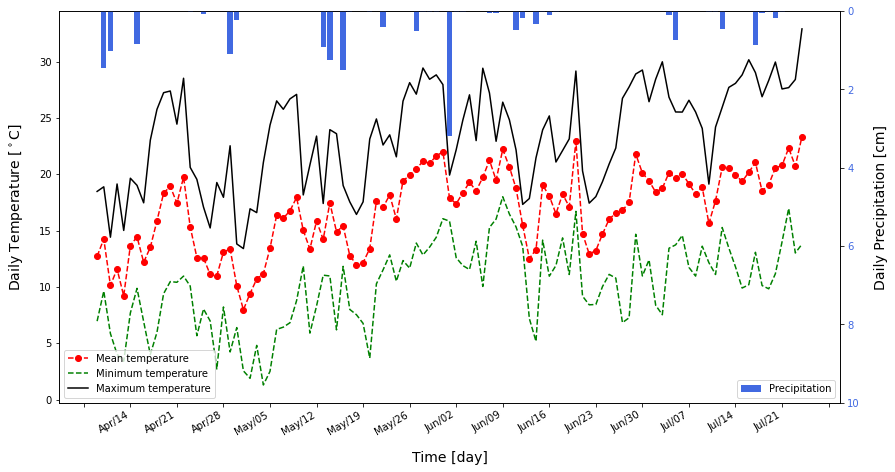

In [6]:
# Plot temperature and precipitation during cropping season
fig, ax1 = plt.subplots(figsize=(14,8))


ax1.plot(xx, temp_avg, 'o--', color='red', label='Mean temperature')
ax1.plot(xx, temp_min, '--', color='green', label='Minimum temperature')
ax1.plot(xx, temp_max, '-', color='black', label='Maximum temperature')

ax2 = ax1.twinx()
ax2.bar(xx, ppt*0.1, color='royalblue', label='Precipitation')
ax2.set_ylim(0, 10)
ax2.invert_yaxis()
ax2.tick_params(axis='y', labelcolor='royalblue')



ax1.set_xlabel('Time [day]', fontsize=14, labelpad=14)
ax1.set_ylabel('Daily Temperature [$^\circ$C]', fontsize=14, labelpad=14)
ax1.legend(loc='lower left')
ax2.set_ylabel('Daily Precipitation [cm]', fontsize=14, labelpad=14)
ax2.legend(loc='lower right')

# ax2.set_xlim('Apr/09', 'Jul/24')
ax2.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
plt.gcf().autofmt_xdate()
plt.savefig('weather data during vegetation period (09.04 - 24.07.2018).png')
plt.show()

In [7]:
# load crop evapotranspiration data

df1 = pd.read_csv('ETc_Tpot_Epot.csv')
df1.head()

,Date,Day,Precipitation,ETo,Avg_temp,ETc,Tpot,Epot,Net_flux,dumux_Tpot,dumux_NETF
0,4/9/2018,1,0.00,1.97,13.28,0.59,0.000583,0.589417,-0.589417,0.000002,-0.058942
1,4/10/2018,2,14.52,3.16,13.16,0.95,0.003750,0.946250,13.573750,0.000011,1.357375
2,4/11/2018,3,10.23,1.08,10.36,0.32,0.002834,0.317166,9.912834,0.000009,0.991283
3,4/12/2018,4,0.00,2.65,11.36,0.80,0.012545,0.787455,-0.787455,0.000038,-0.078745
4,4/13/2018,5,0.00,1.88,10.20,0.56,0.013652,0.546348,-0.546348,0.000041,-0.054635


In [8]:
# convert to arrays

etc = df1.ETc.values
eto = df1.ETo.values
epot = df1.Epot.values
tpot = df1.Tpot.values

In [9]:
# maximum reference evapotranspiration during cropping season
eto.max()

7.94

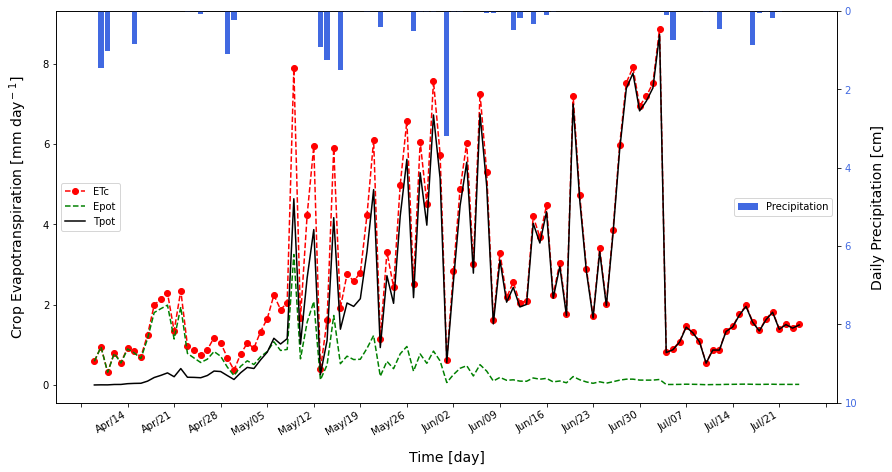

In [14]:
# plot crop evapotranspiration,precipitation, potential transpiration and evaporation during cropping season
fig, ax1 = plt.subplots(figsize=(14,8))


ax1.plot(xx, etc, 'o--', color='red', label='ETc')
ax1.plot(xx, epot, '--', color='green', label='Epot')
ax1.plot(xx, tpot, '-', color='black', label='Tpot')
# ax1.plot(xx, eto, '*-', color='gray', label='ETo')

ax2 = ax1.twinx()
ax2.bar(xx, ppt*0.1, color='royalblue', label='Precipitation')
ax2.set_ylim(0, 10)
ax2.invert_yaxis()
ax2.tick_params(axis='y', labelcolor='royalblue')

ax1.set_xlabel('Time [day]', fontsize=14, labelpad=14)
ax1.set_ylabel('Crop Evapotranspiration [mm day$^-$$^1$]', fontsize=14, labelpad=14)
ax1.legend(loc='center left')
ax2.set_ylabel('Daily Precipitation [cm]', fontsize=14, labelpad=14)
ax2.legend(loc='center right')

# ax2.set_xlim('Apr/09', 'Jul/24')
ax2.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
plt.gcf().autofmt_xdate()
plt.savefig('ETc during vegetation period (09.04 - 24.07.2018).png')
plt.show()

In [20]:
print('Mean annual precipitation: ', data['precipitation'].mean())
print('Sum annual precipitation: ', data['precipitation'].sum())
print('Mean annual temperature: ', data['avg_temp'].mean())
print('Sum annual temperature: ', data['avg_temp'].sum())

Mean annual precipitation:  1.2161643835616438
Sum annual precipitation:  443.9
Mean annual temperature:  11.405383561643836
Sum annual temperature:  4162.965


In [21]:
# monthly average precipitation and temperature
g = data.groupby(['month'], sort=False)
monthly_averages = g.aggregate(precipitation=pd.NamedAgg(column='precipitation', aggfunc=np.mean),
                               temperature=pd.NamedAgg(column='avg_temp', aggfunc=np.mean))

In [22]:
monthly_averages

,precipitation,temperature
month,,
Jan,1.763548,5.791452
Feb,0.471429,-0.142679
Mar,1.100000,4.788710
Apr,1.609667,12.829833
May,1.508065,15.837258
Jun,1.488667,17.704167
Jul,0.949355,20.796774
Aug,0.616129,19.538226
Sep,1.233333,15.241333


In [23]:
print('Mean monthly precipitation: ', monthly_averages['precipitation'].mean())
print('Mean monthly temperature: ', monthly_averages['temperature'].mean())

Mean monthly precipitation:  1.210177291346646
Mean monthly temperature:  11.330388792882744


In [24]:
x = monthly_averages.index
y = monthly_averages.precipitation.values     # precipitation
y1 = monthly_averages.temperature.values      # temperature

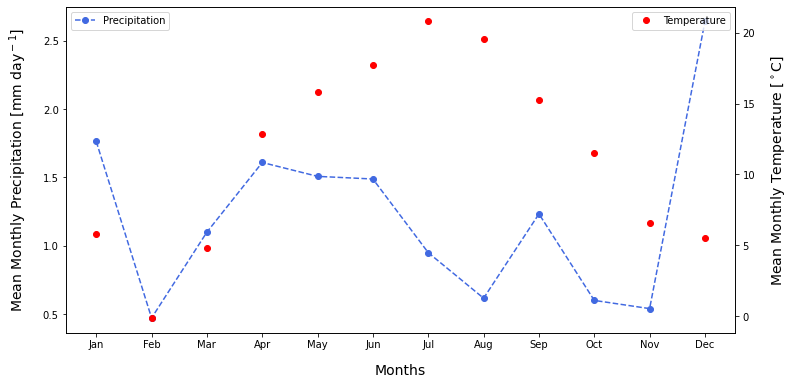

In [33]:
# plot monthly average precipitation and temperature for the year 2018
fig, ax1 = plt.subplots(figsize=(12,6))

ax2 = ax1.twinx()
ax1.plot(x, y, 'o--', color='royalblue', label='Precipitation')
ax2.plot(x, y1, 'ro', label='Temperature')

ax1.set_xlabel('Months', fontsize=14, labelpad=14)
ax1.set_ylabel('Mean Monthly Precipitation [mm day$^-$$^1$]', fontsize=14, labelpad=14)
ax1.legend()
ax2.set_ylabel('Mean Monthly Temperature [$^\circ$C]', fontsize=14, labelpad=14)
ax2.legend()

plt.savefig('weather data CKA 2018.png')
plt.show()